# Introduction to Datashader

In [1]:
import colorcet as cc
import datashader as ds
import datashader.transfer_functions as tf
import pandas as pd

## 1. Read data from parquet file into pandas DataFrame

In [2]:
df = pd.read_parquet("parq")
df

,x,y,area_code,highest_qualification,ethnic_group
0,451190.812500,209829.859375,E00145643,level4,white
1,451161.812500,209756.437500,E00145643,level1,white
2,451206.125000,209716.296875,E00145643,other,white
3,451205.656250,209827.750000,E00145643,level4,white
4,451169.062500,209636.859375,E00145643,level4,white
...,...,...,...,...,...
63182173,257583.921875,362992.312500,W00000322,other,white
63182174,257587.984375,363063.000000,W00000322,other,white
63182175,257919.312500,363093.875000,W00000322,level2,white
63182176,257624.062500,362975.687500,W00000322,level2,white


## 2. Height and width of image using correct aspect ratio

In [3]:
height = 750
aspect = (df.x.max() - df.x.min()) / (df.y.max() - df.y.min())
width = int(height*aspect)

## 3. Calculate counts per pixel

In [4]:
cvs = ds.Canvas(width, height)
counts = cvs.points(df, "x", "y")
type(counts), counts.shape, counts.dtype, counts.min().item(), counts.max().item()

(xarray.core.dataarray.DataArray, (750, 405), dtype('uint32'), 0, 50211)

## 4. Apply a colourmap to the counts to obtain an image

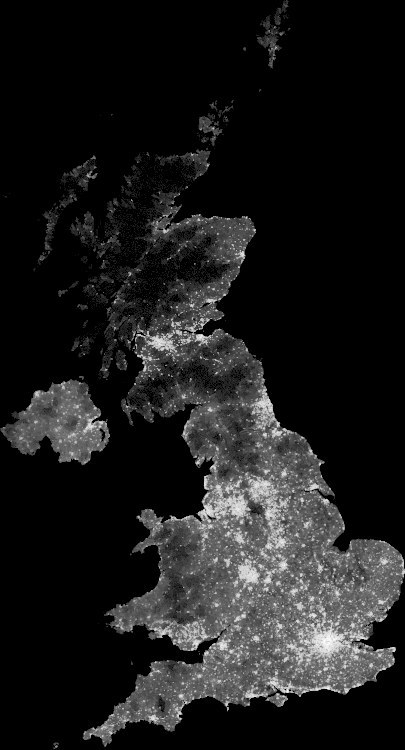

In [5]:
im = tf.shade(counts, how="log", cmap=cc.gray)
tf.set_background(im, "black")

## 5. Try histogram equalisation

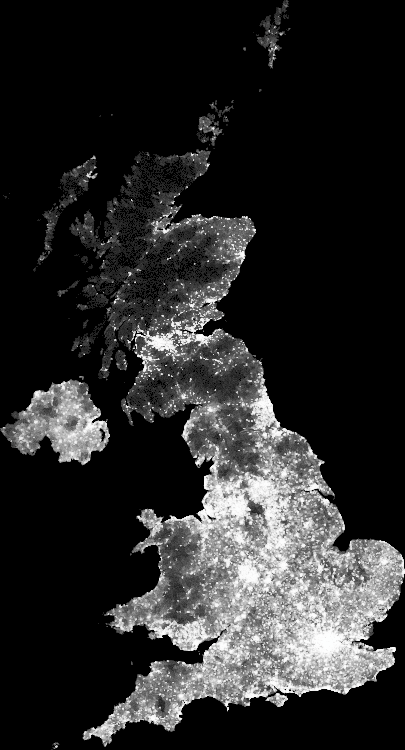

In [6]:
tf.set_background(tf.shade(counts, how='eq_hist', cmap=cc.gray[30:]), "black")

## 6. A more interesting colourmap

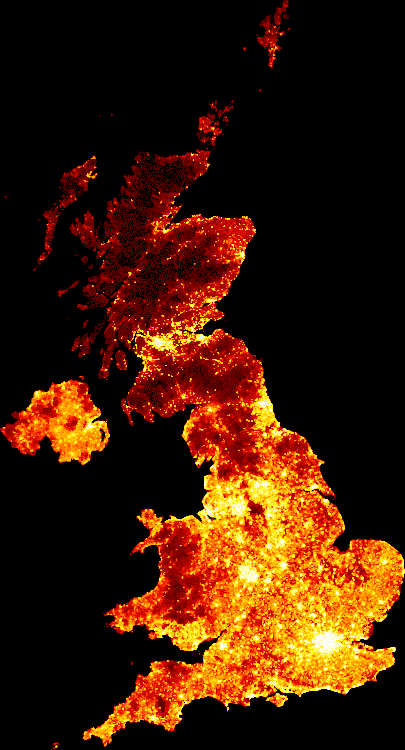

In [7]:
tf.set_background(tf.shade(counts, how="eq_hist", cmap=cc.fire[30:]), "black")  # Try cc.bgy or cc.rainbow?

## Keywords: beautiful, fast, concise